In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.shape

(2240, 30)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Dataset terdiri dari 30 fitur dan 2240 baris
- Missing value terdapat pada fitur Income
- Tidak ada data yang duplikat

# Data Cleaning

In [ ]:
df1 = df.copy()

## Handling Outlier

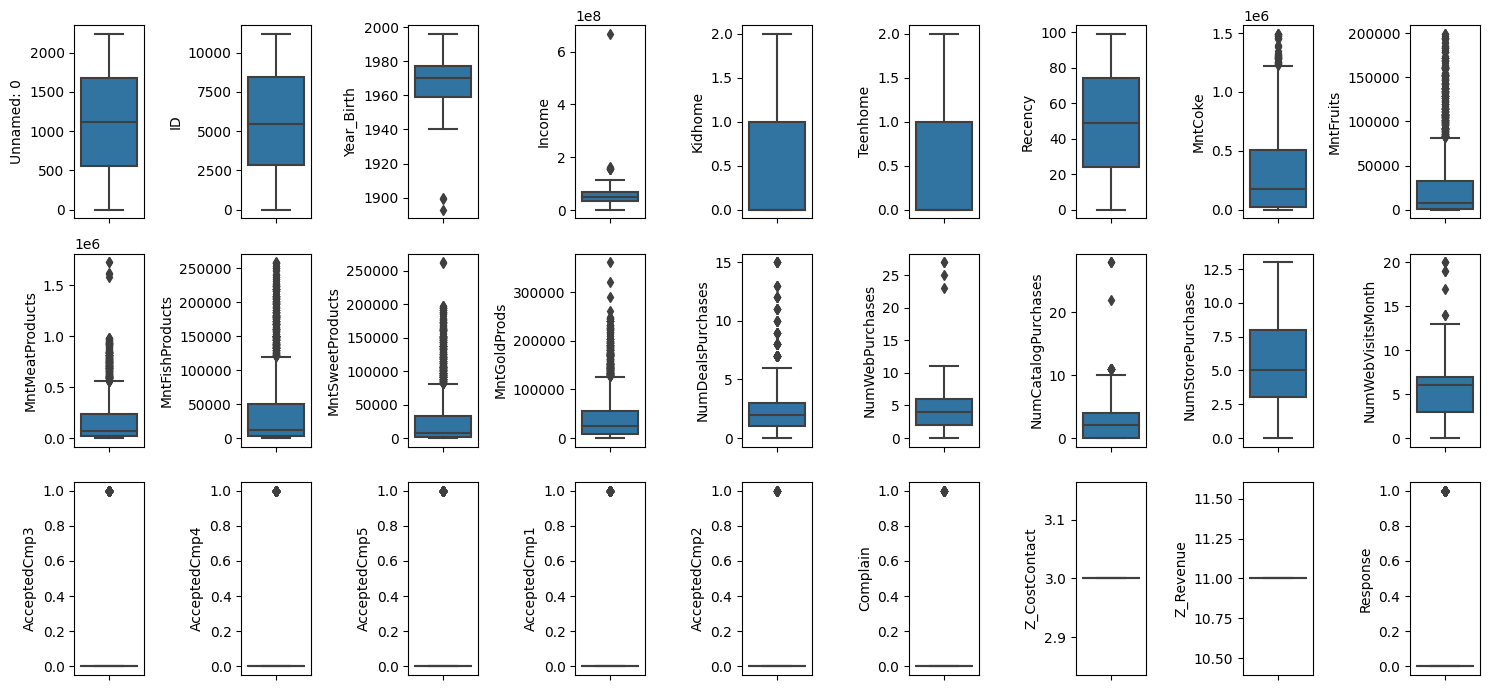

In [ ]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Secara keseluruhan data cenderung memiliki outlier. Terlihat nilai ekstrim pada fitur **Income** dan **Year_Birth**

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


Hasil setelah dilakukan handling outlier

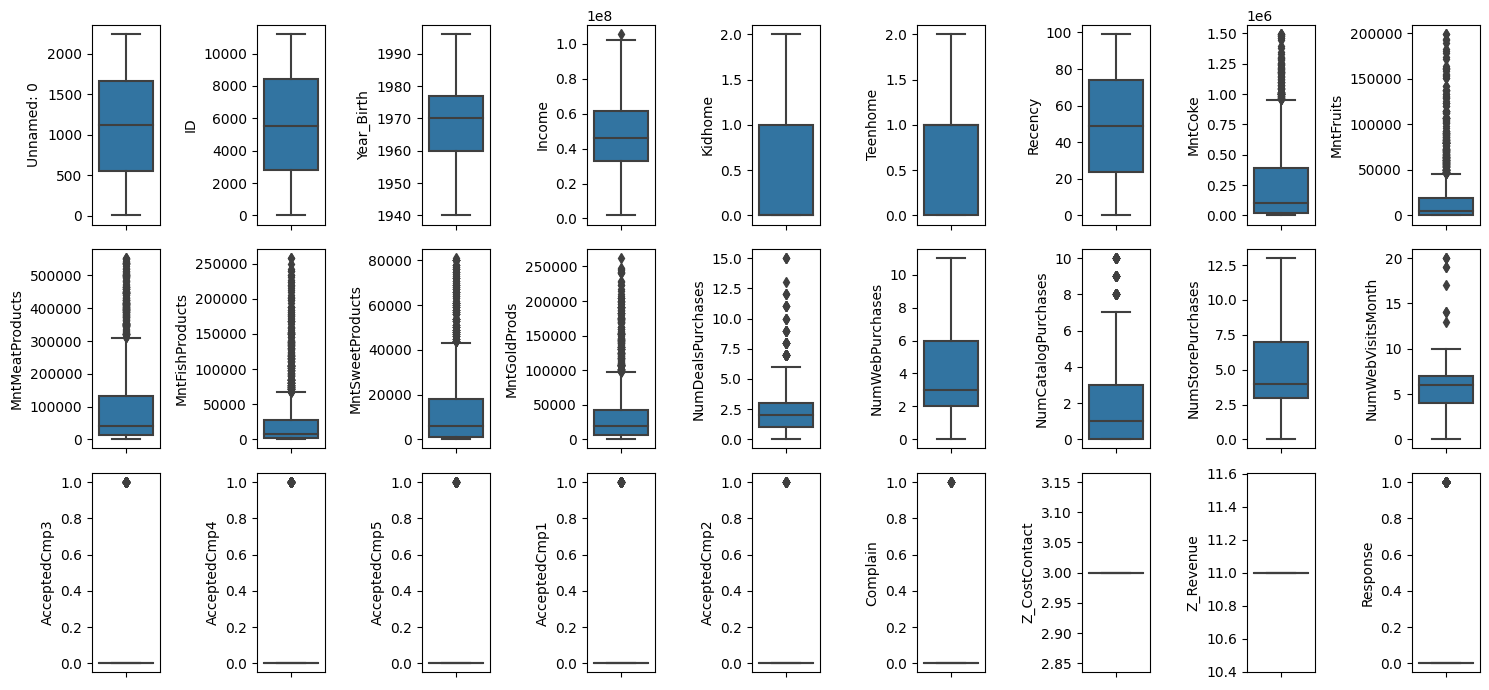

In [ ]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

## Handling Missing Value

Handling missing value dilakukan dengan imputasi nilai median (robust)

In [ ]:
df1.fillna(df1['Income'].median(), inplace=True)

In [ ]:
df1.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Feature Engineering

In [ ]:
# conversion to datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# create membership duration column
# ------------------------------------------------------------
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

In [ ]:
df1['Membership_Duration'].value_counts()

10    975
9     471
11    394
Name: Membership_Duration, dtype: int64

In [ ]:
# create age column
df1['Age'] = 2023 - df1['Year_Birth']

In [ ]:
# create age group column
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young Adult',
                      np.where(df1['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [ ]:
df1['Age_Categories'].value_counts()

Middle-Aged Adult    1038
Old Adult             597
Young Adult           205
Name: Age_Categories, dtype: int64

In [ ]:
# create total children column
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [ ]:
df1['Total_Children'].value_counts()

1    1027
2     405
0     359
3      49
Name: Total_Children, dtype: int64

In [ ]:
# create total transaction column
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [ ]:
# create total spending column
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts']

In [ ]:
# create total accepted campaigns column
# Total accepted campaigns
df1['Total_Accepted_Campaigns'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [ ]:
# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['Conversion_Rate'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

In [ ]:
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Membership_Duration,Age,Age_Categories,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaigns,Conversion_Rate
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,11,0,9,69,Old Adult,2,6,21000,0,1.20
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,11,0,10,58,Middle-Aged Adult,0,21,734000,0,5.25
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,11,0,9,39,Young Adult,1,8,48000,0,1.33
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,11,0,9,42,Middle-Aged Adult,1,19,407000,0,3.80
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,...,11,0,10,56,Middle-Aged Adult,1,22,702000,0,3.67


# Exploratory Data Analysis

In [ ]:
df2 = df1.copy()

In [ ]:
# numerical feature
nums = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaigns', 'Conversion_Rate']

In [ ]:
# categorical fearure
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


## Descriptive Analysis

In [ ]:
df2[nums].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1840.0,46945913.59,18665446.62,1730000.0,32892000.00,46014500.0,61297250.0,105471000.0
Recency,1840.0,48.55,28.91,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1840.0,9.96,0.68,9.0,9.00,10.0,10.0,11.0
Age,1840.0,53.98,11.48,27.0,46.00,53.0,63.0,83.0
Total_Children,1840.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1840.0,13.58,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1840.0,405127.72,454528.15,4000.0,44000.00,216000.0,699250.0,2188000.0
Total_Accepted_Campaigns,1840.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
Conversion_Rate,1840.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


- Rata-rata pelanggan telah menjadi member selama 10 tahun
- Rata-rata pelanggan hanya memiliki satu anak
- Rata-rata pelanggan melakukan 13-14 transaksi
- Rata-rata pelanggan berbelanja mengeluarkan biaya Rp.405.127
- Mayoritas pelanggan tidak menerima campaign
- Konversi kunjungan web dengan pembelian mayoritas pelanggan hanya sebesar 3.29%

In [ ]:
df2[cats].describe().T

,count,unique,top,freq
Education,1840,5,S1,904
Marital_Status,1840,6,Menikah,718
Age_Categories,1840,3,Middle-Aged Adult,1038


Mayoritas pelanggan berasal dari latar pendidikan S1, telah menikah, dan Middle-Aged Adult

## Univariate Analysis

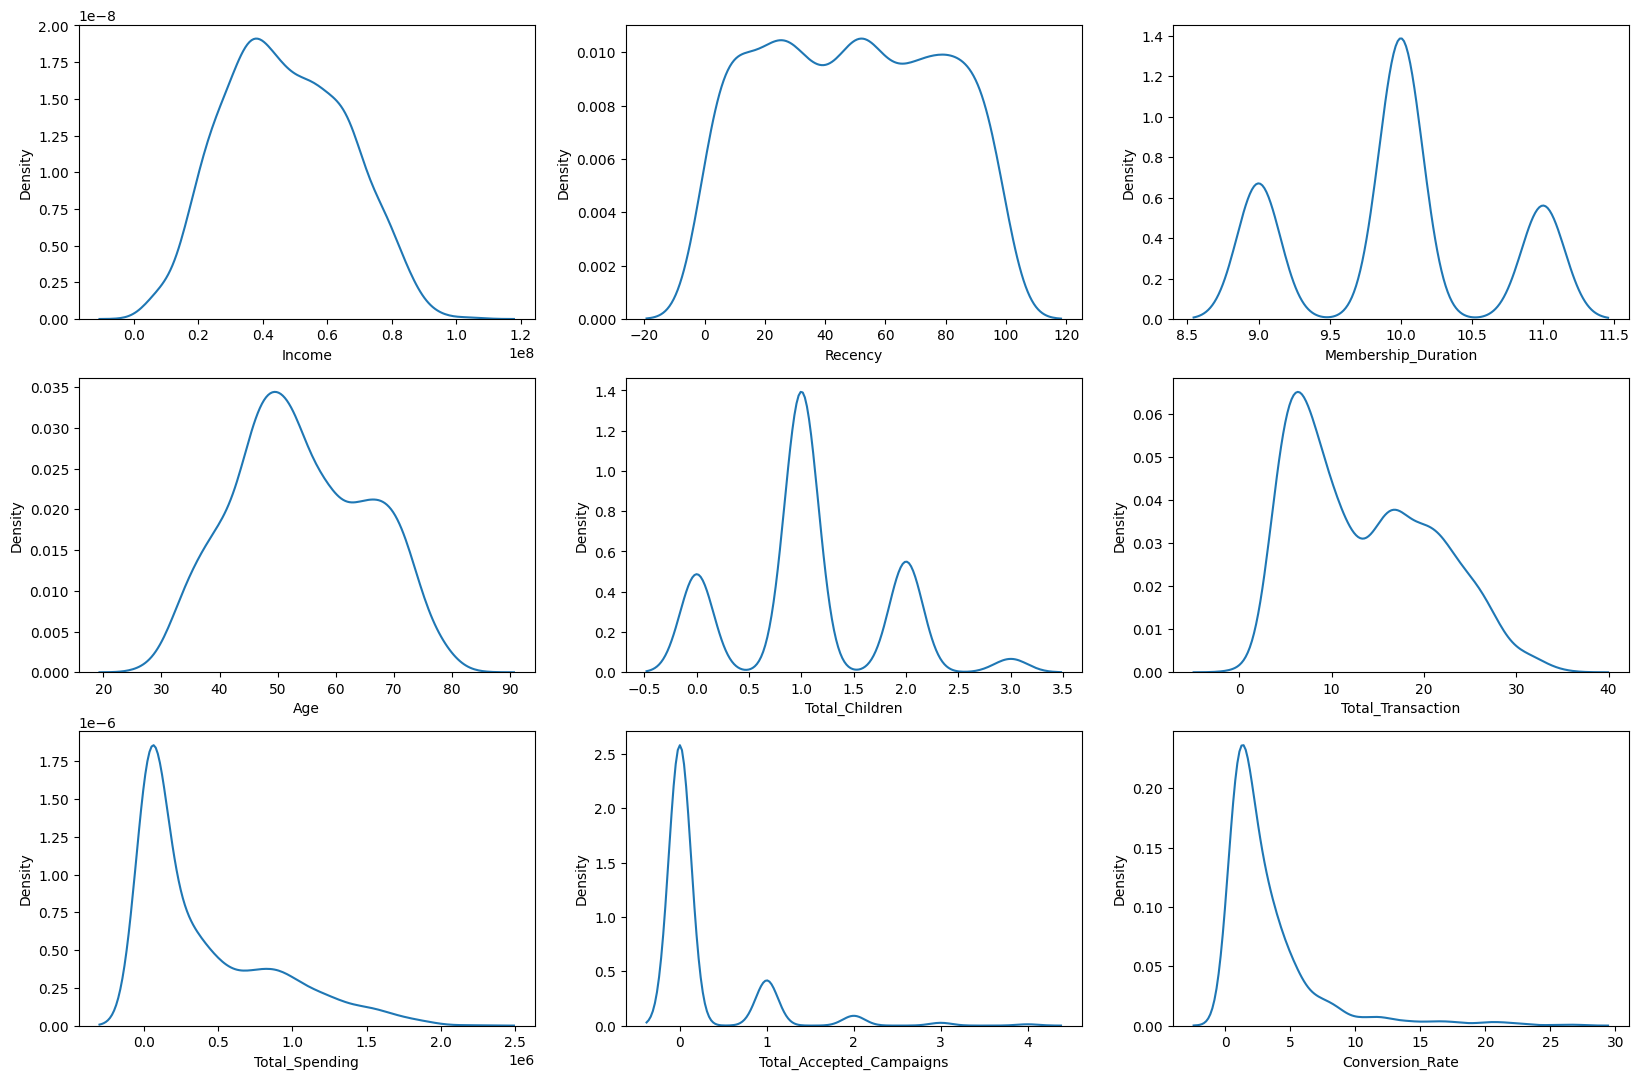

In [ ]:
# cek distribusi fitur numerikal
plt.figure(figsize = (20, 13))
for i in range(len(nums)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data = df2, x = nums[i])

- Distribusi fitur Income, Age, dan Recency cenderung mendekati distribusi normal
- Distribusi Total_Transaction, Total_Spending dan CVR mederung positively skewed

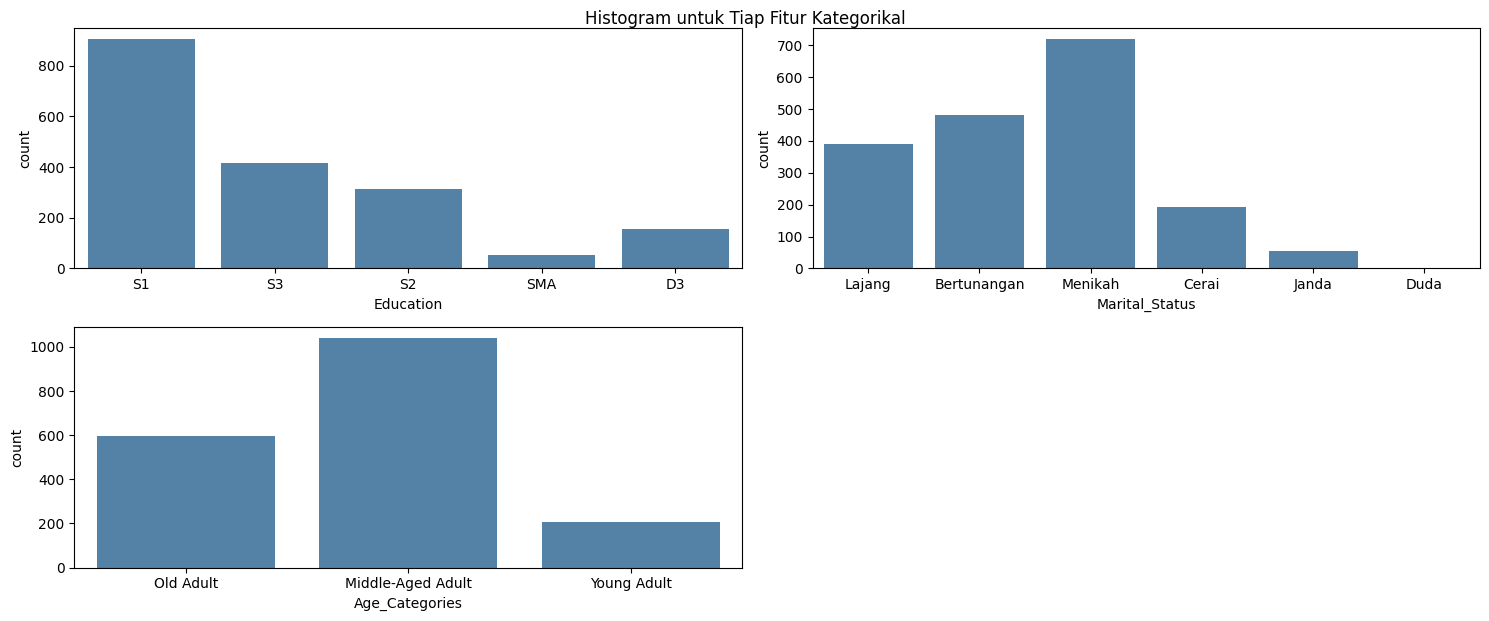

In [ ]:
# Create histplot for categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Histogram untuk Tiap Fitur Kategorikal')
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df2[cats[i]], color='steelblue')
    plt.tight_layout()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 1 to 2239
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1840 non-null   int64         
 1   ID                        1840 non-null   int64         
 2   Year_Birth                1840 non-null   int64         
 3   Education                 1840 non-null   object        
 4   Marital_Status            1840 non-null   object        
 5   Income                    1840 non-null   float64       
 6   Kidhome                   1840 non-null   int64         
 7   Teenhome                  1840 non-null   int64         
 8   Dt_Customer               1840 non-null   datetime64[ns]
 9   Recency                   1840 non-null   int64         
 10  MntCoke                   1840 non-null   int64         
 11  MntFruits                 1840 non-null   int64         
 12  MntMeatProducts     

## Bivariate Analysis

**Conversion Rate vs Income, Spending, and Age**

Pada tahap ini akan dilakukan analisis mengenai hubungan Conversion Rate dengan income, total spending, dan usia pelanggan.

In [ ]:
variable = ['Income', 'Total_Spending', 'Age']

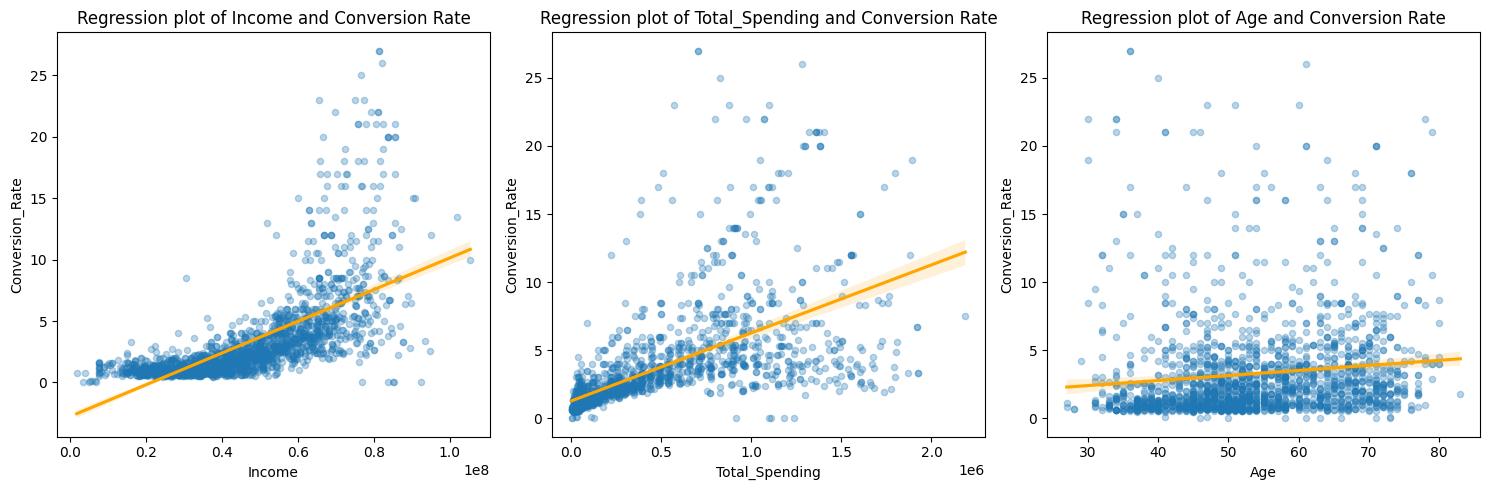

In [ ]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df2[variable[var]], y='Conversion_Rate', data=df2, scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()

- Terlihat adanya korelasi positif antara Conversion Rate khususnya dengan Income dan Total Spending.
- Semakin tinggi Pendapatan dan Total Spending pelanggan, maka Conversion Rate juga semakin tinggi. Income dan Total Spending menunjukkan kapasitas keuangan pelanggan, pelanggan dengan kapasitas keuangan yang lebih tinggi memiliki Conversion Rate yang lebih tinggi.
- Usia tidak menunjukkan korelasi yang tinggi denganConversion Rate. Conversion Rate terdistribusi dengan baik pada setiap umur, hal ini menunjukkan bahwa umur tidak berpengaruh signifikan terhadap Conversion Rate pelanggan.